Logistic Regression 





Define the hypothesis and the cost function

Kaggle Data

https://www.kaggle.com/CooperUnion/cardataset

https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html

https://www.tableau.com/learn/articles/free-public-data-sets


Logistic Regression

refer: https://github.com/yighu/Machine-Learning-With-Python/blob/master/logisticRegressionWithOptimizationFunc.ipynb


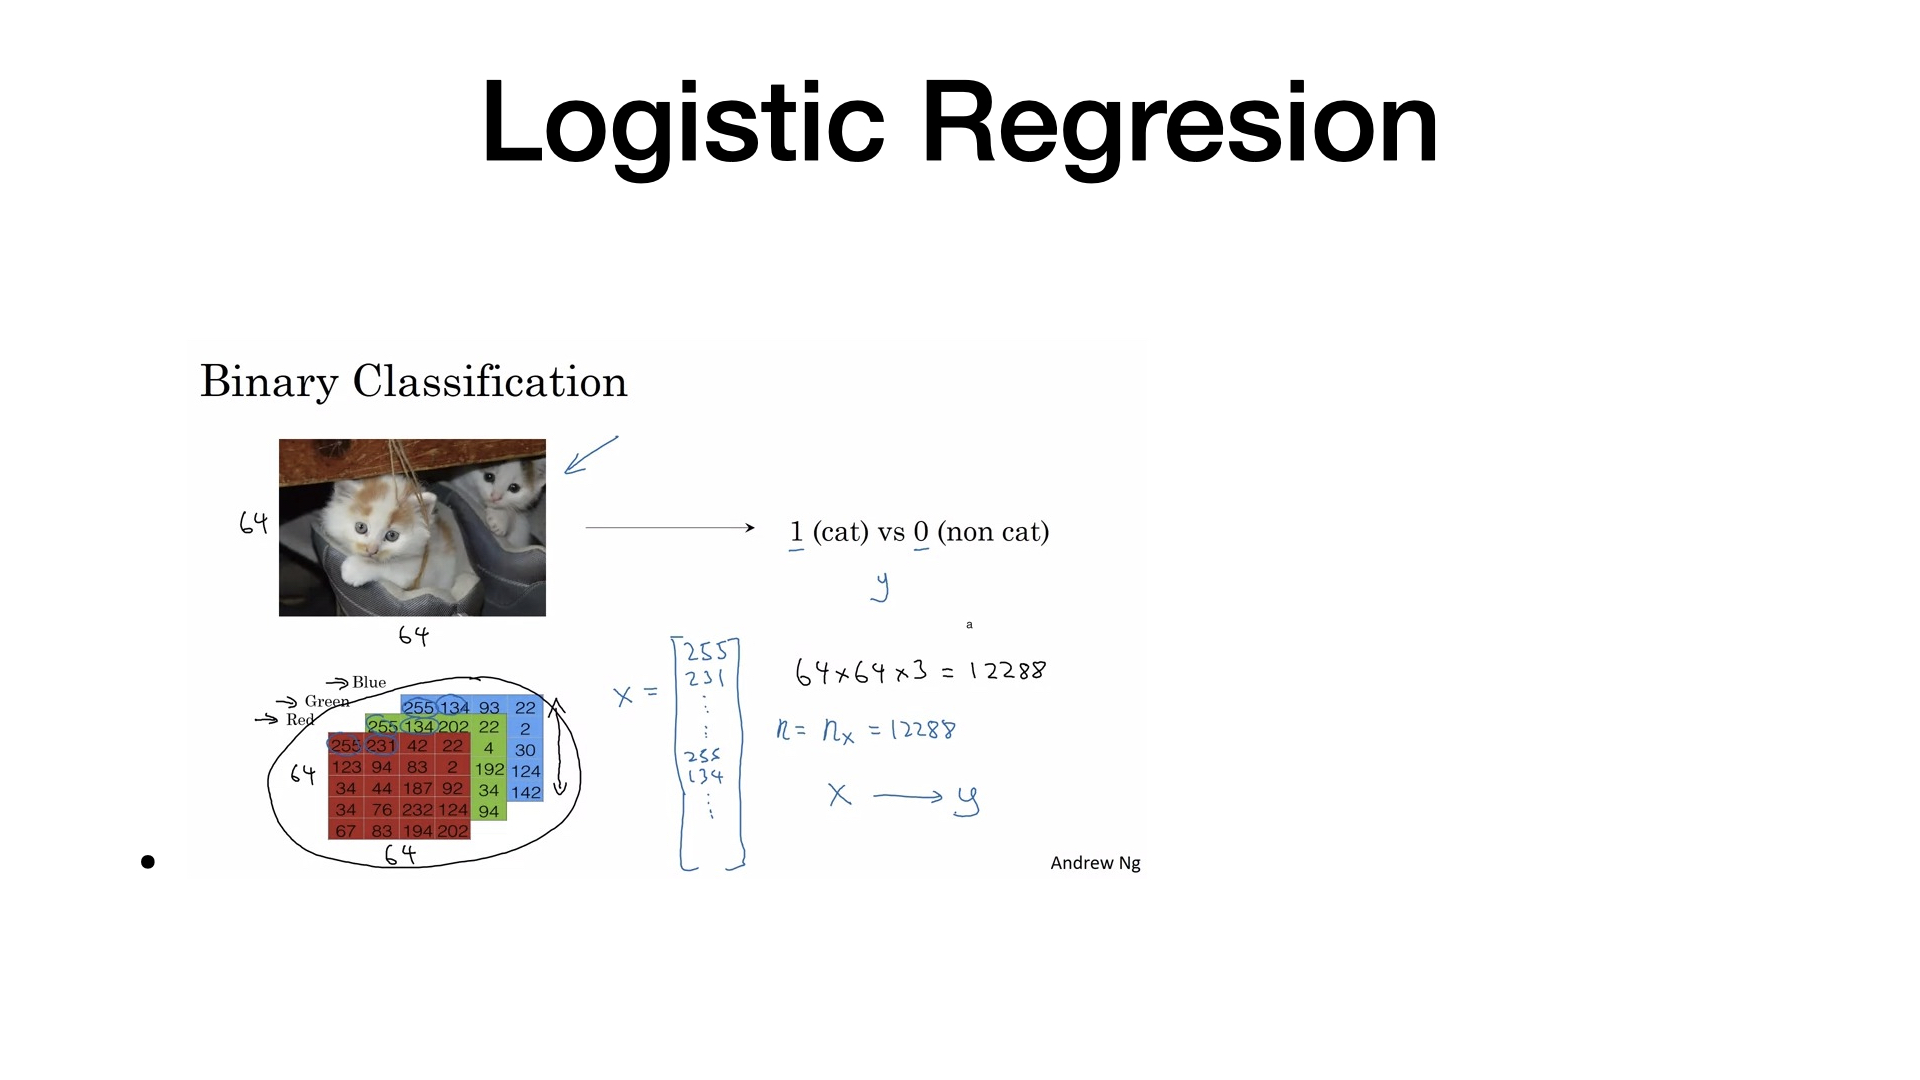

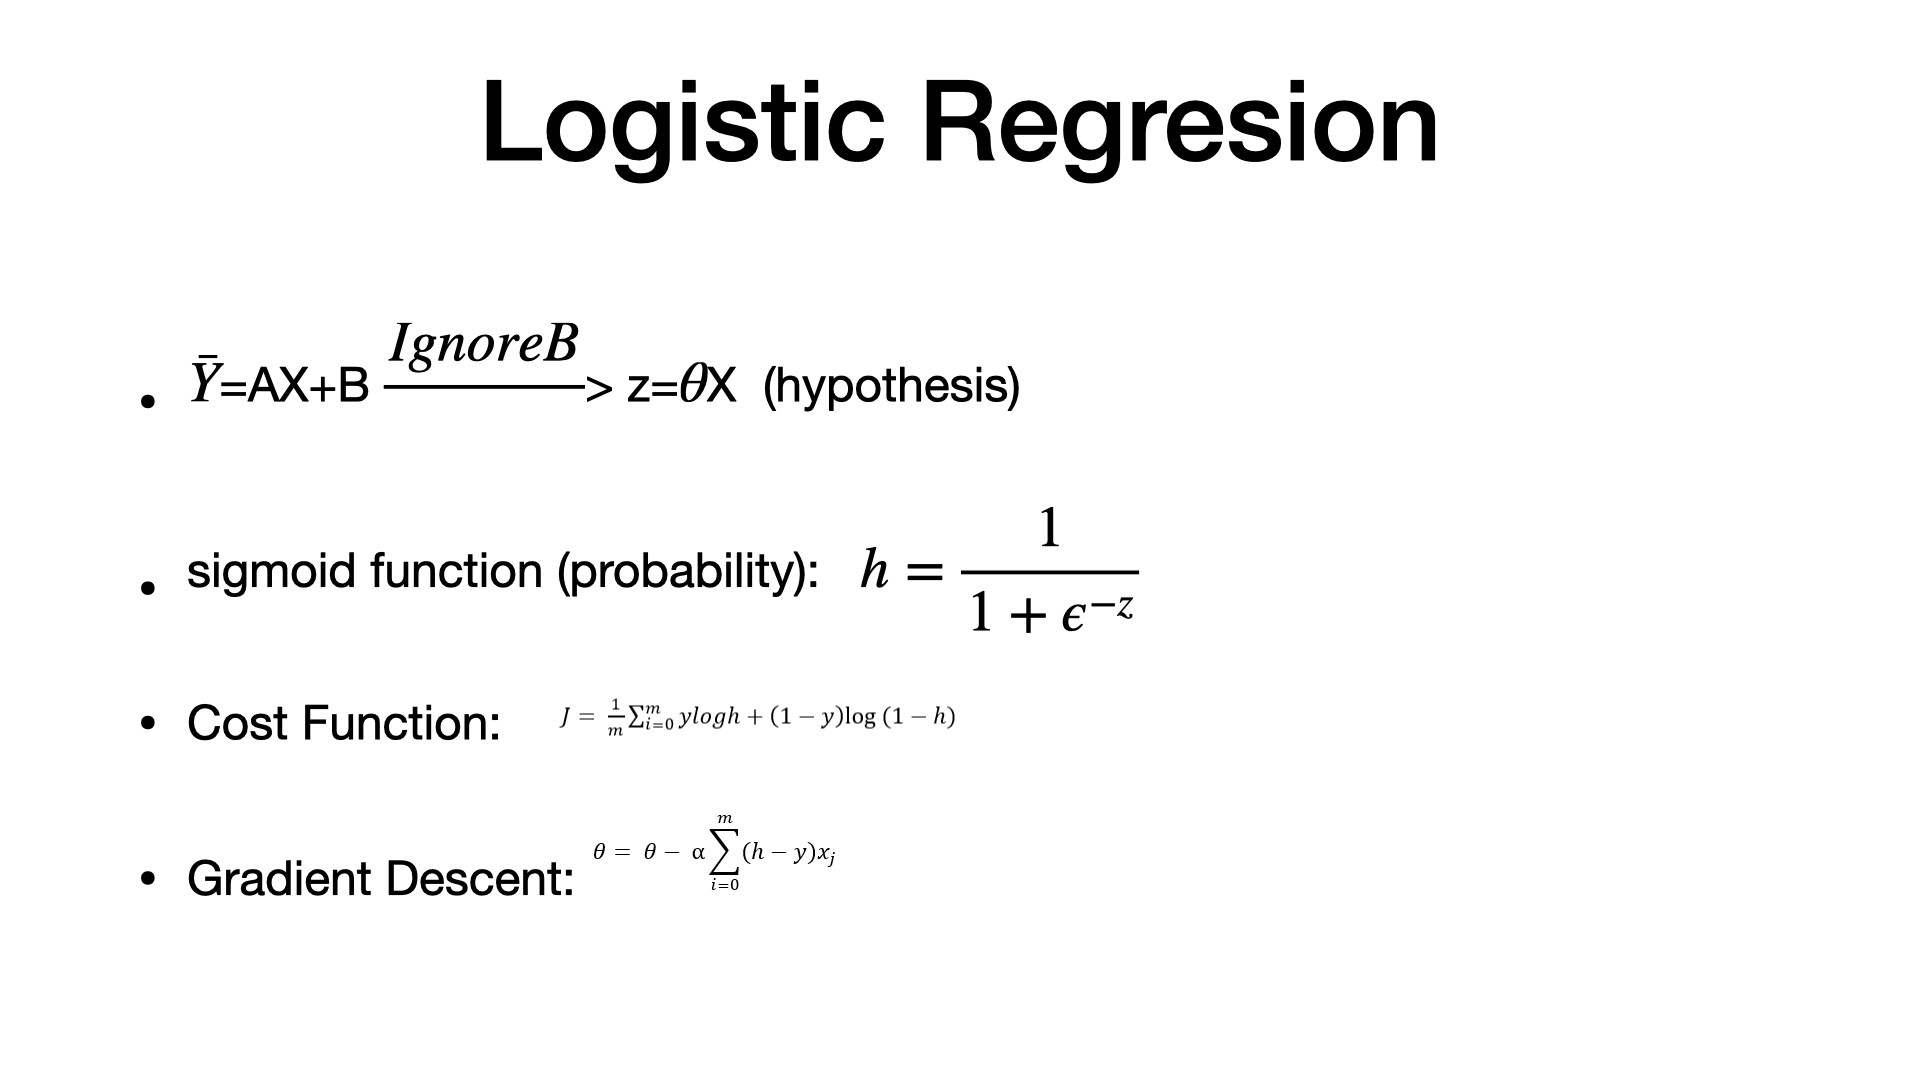

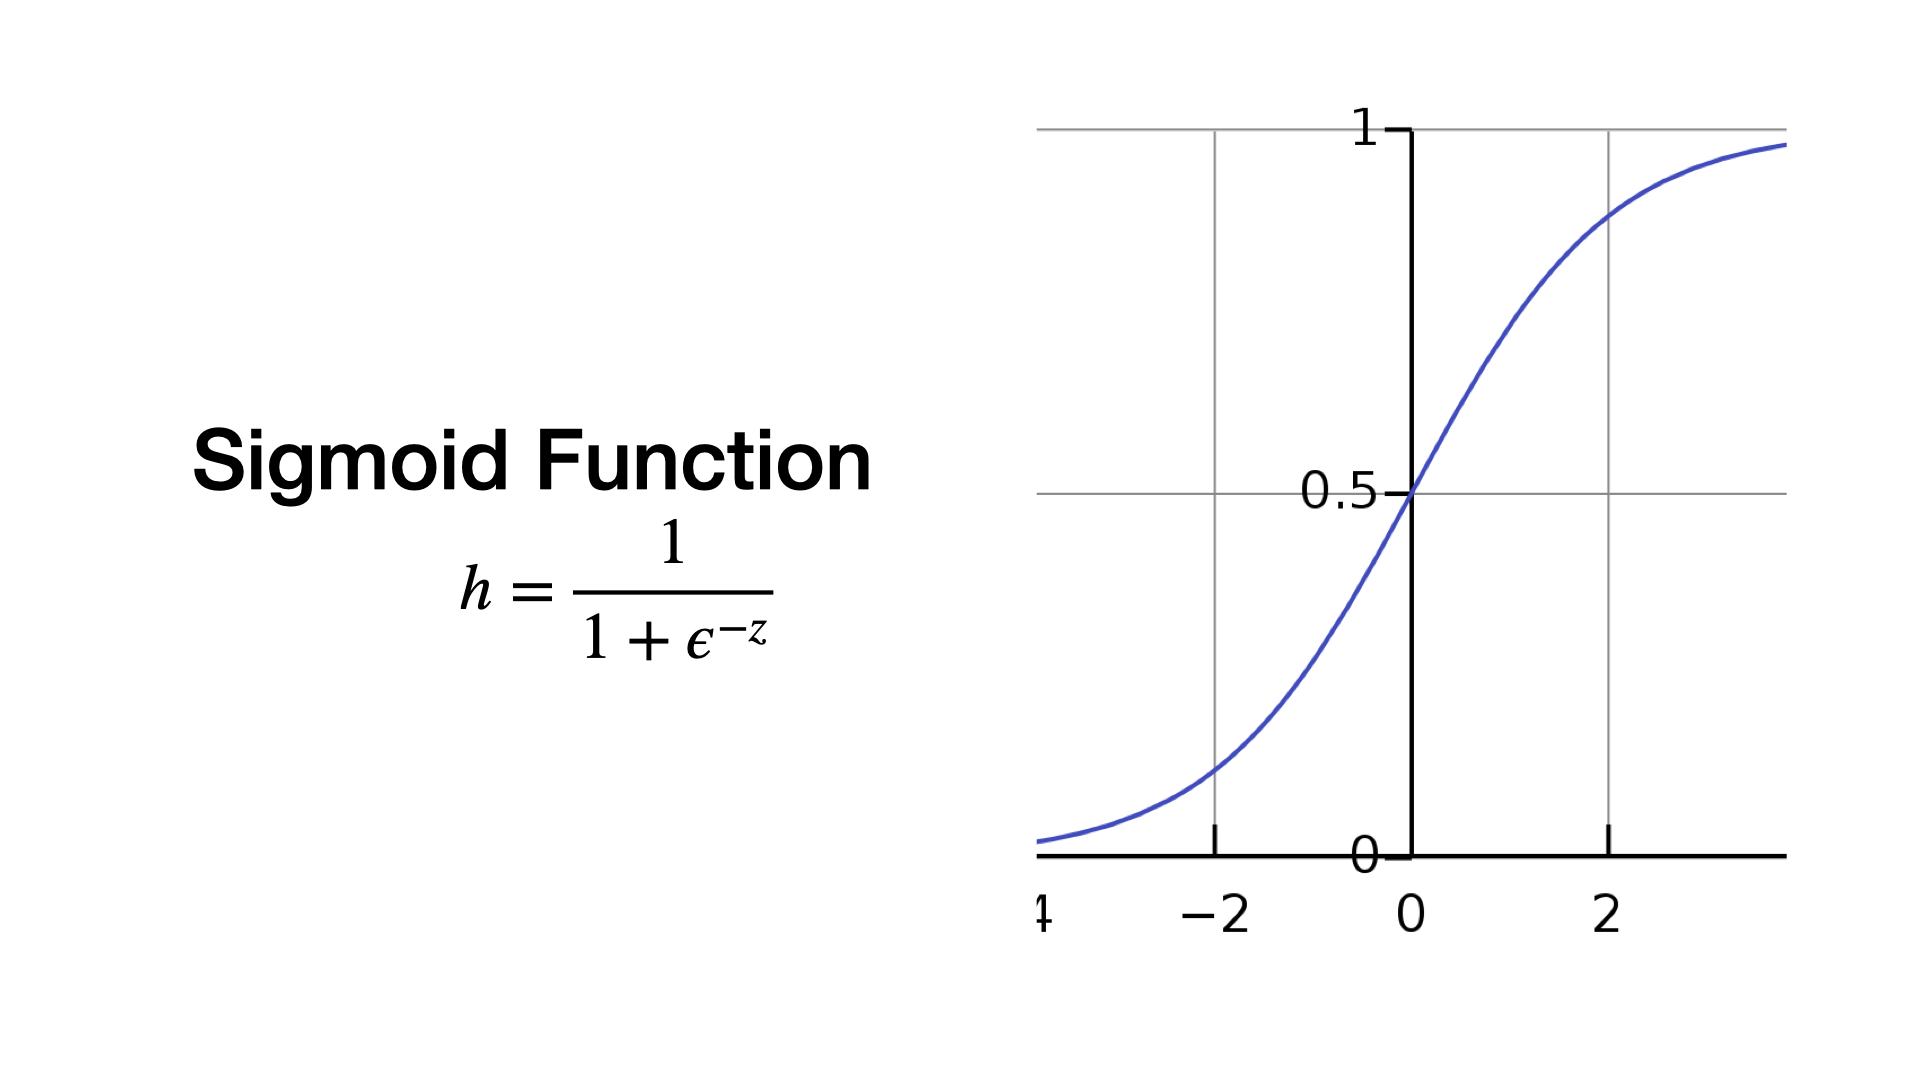

Sigmoid funciton


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Download data

In [127]:
url="https://github.com/yighu/Machine-Learning-With-Python/raw/master/ex2data1.txt"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [128]:
def pickError(data):
    yes=0
    if abs(data)<7:
        yes = 1
    return yes

In [129]:
a = range(0,200)
y0=[5 + 0.5*i for i in list(a)]

y1=[5 + 0.5*i +(0.5-random.random())*20 for i in list(a)]
z0 = [pickError(d) for d in np.subtract(y1,y0)]
df = pd.DataFrame(list(zip(list(a),y1,z0)), columns = ['0','1','2'])


<AxesSubplot:>

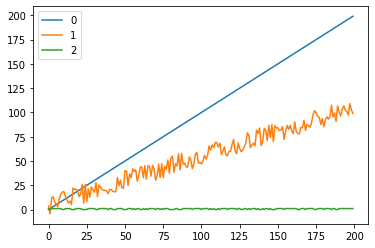

In [130]:
#df.plot.scatter("0", "1")
df.plot()

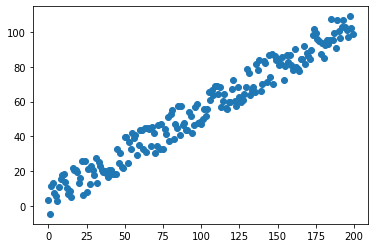

In [157]:
plt.scatter(df['0'], df['1'])
plt.show()

In [158]:
X = df.iloc[:, :-1]
X.head(3)

,0,1
0,0,3.679808
1,1,-4.498426
2,2,11.786946


In [159]:
y = df.iloc[:, -1]

In [134]:
y[:3]

0    1
1    0
2    1
Name: 2, dtype: int64

In [160]:
#y = y[:, np.newaxis]
#y[:10]

In [161]:

#X = np.c_[np.ones((X.shape[0], 1)), X]
#X[:10]

In [162]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.]])

In [163]:

z = np.dot(X, theta)
z[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [164]:

h = 1/(1+np.exp(-z))
h[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [140]:

m = X.shape[0]
m

200

In [141]:
cost = -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))
cost

0.6931471805599452

In [142]:
grad = (1/m) * np.dot(X.T, (h-y))
grad

array([[ -0.17      ],
       [-19.385     ],
       [-10.26619279]])

In [143]:
def sigmoid(x, theta):
    z= np.dot(x, theta)
    return 1/(1+np.exp(-z))

hypothesis

In [144]:
def hypothesis(theta, x):
    return sigmoid(x, theta)
    

Cost function

In [145]:
def cost_function(theta, x, y):
    m = X.shape[0]
    h = hypothesis(theta, x)
    return -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

Gradient

In [146]:

def gradient(theta, x, y):
    m = X.shape[0]
    h = hypothesis(theta, x)
    return (1/m) * np.dot(X.T, (h-y))

In [151]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(theta, X, y)] 
    for i in range(0, epochs):
        h = hypothesis(theta, X)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(theta, X, y))
    return J, theta

fitting

In [153]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(theta, X )
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc


In [165]:
X

,0,1
0,0,3.679808
1,1,-4.498426
2,2,11.786946
3,3,13.289671
4,4,7.687116
...,...,...
195,195,101.073004
196,196,97.297912
197,197,109.033082
198,198,102.527711


In [168]:
theta

array([[0.],
       [0.]])

In [170]:
theta = pd.DataFrame(theta, columns = ['a'])


In [171]:
y

0      1
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: 2, Length: 200, dtype: int64

In [172]:
#theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000)

TypeError: 'numpy.float64' object is not callable

In [96]:

from scipy.optimize import minimize,fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)

  NIT   NF   F                       GTG
    0    1  6.931471805599452E-01   4.20216904E+02
tnc: fscale = 0.0487824
    1    3  6.428458426335345E-01   1.21709859E+00
    2    5  6.426200453918668E-01   4.21902274E-02
tnc: fscale = 4.86849
    3    7  6.426108880405346E-01   2.30107575E-02
    4    9  6.353151426447676E-01   1.50216365E-01
    5   11  6.352219015344303E-01   1.47535797E-01
    6   13  6.349956520196074E-01   4.16748825E-01
    7   15  6.306951738548358E-01   2.72296769E-01
    8   17  6.306530437047327E-01   3.86791587E-04
    9   19  6.306484804337363E-01   4.15188033E-04
   10   21  6.306484156746607E-01   1.98444669E-05
tnc: fscale = 224.481
   11   23  6.306483791978937E-01   2.38260390E-04
   12   25  6.306417436973116E-01   2.88799816E-05
   13   27  6.306416008594630E-01   1.97140290E-05
tnc: |fn-fn-1] = 8.14918e-09 -> convergence
   14   29  6.306415927102849E-01   8.91360862E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [97]:
parameters

array([ 0.70423773,  0.02099536, -0.0376305 ])

In [98]:
h = hypothesis(parameters, X)


In [99]:
print(X)

[[ 1.00000000e+00  0.00000000e+00  9.28092963e+00]
 [ 1.00000000e+00  1.00000000e+00 -4.98600756e-01]
 [ 1.00000000e+00  2.00000000e+00 -3.77199436e+00]
 [ 1.00000000e+00  3.00000000e+00 -2.13872937e+00]
 [ 1.00000000e+00  4.00000000e+00  1.70527895e+00]
 [ 1.00000000e+00  5.00000000e+00 -1.65443772e+00]
 [ 1.00000000e+00  6.00000000e+00  5.50100411e+00]
 [ 1.00000000e+00  7.00000000e+00  1.36879856e+01]
 [ 1.00000000e+00  8.00000000e+00 -1.39520905e-01]
 [ 1.00000000e+00  9.00000000e+00  1.65816041e+01]
 [ 1.00000000e+00  1.00000000e+01  8.01150375e+00]
 [ 1.00000000e+00  1.10000000e+01  8.20752678e+00]
 [ 1.00000000e+00  1.20000000e+01  1.93885814e+01]
 [ 1.00000000e+00  1.30000000e+01  1.01999269e+01]
 [ 1.00000000e+00  1.40000000e+01  1.57701972e+01]
 [ 1.00000000e+00  1.50000000e+01  9.69163733e+00]
 [ 1.00000000e+00  1.60000000e+01  2.18829279e+01]
 [ 1.00000000e+00  1.70000000e+01  1.29988097e+01]
 [ 1.00000000e+00  1.80000000e+01  1.20195082e+01]
 [ 1.00000000e+00  1.90000000e+

Predict

In [100]:
def predict(h):
    h1 = []
    for i in h:
        if i>=0.5:
            h1.append(1)
        else:
            h1.append(0)
    return h1
y_pred = predict(h)
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [101]:
accuracy = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == y[i]:
        accuracy += 1
accuracy/len(y)

0.665

In [102]:
import random

In [103]:
a = range(0,200)
y0=[5 + 0.5*i for i in list(a)]

y1=[5 + 0.5*i +(0.5-random.random())*20 for i in list(a)]
z0 = [pickError(d) for d in np.subtract(y1,y0)]
df = pd.DataFrame(list(zip(list(a),y1,z0,y0)), columns = ['0','1','2','3'])

                           

In [104]:
df.head()

,0,1,2,3
0,0,14.611368,0,5.0
1,1,-2.019942,0,5.5
2,2,13.748227,0,6.0
3,3,4.353976,1,6.5
4,4,12.910691,1,7.0


<AxesSubplot:>

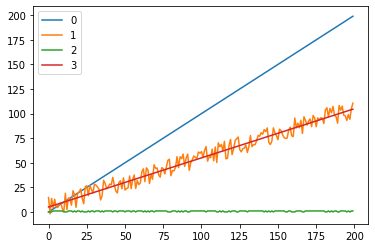

In [105]:
df.plot()

In [106]:
X = df.iloc[:, :-2]
X.head(3)

,0,1
0,0,14.611368
1,1,-2.019942
2,2,13.748227


In [107]:
y = df.iloc[:, -2]

In [108]:
y

0      0
1      0
2      0
3      1
4      1
      ..
195    0
196    1
197    0
198    1
199    1
Name: 2, Length: 200, dtype: int64

In [109]:
y = y[:, np.newaxis]
y[:10]

/tmp/ipykernel_2065435/4136577478.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [110]:
X = np.c_[np.ones((X.shape[0], 1)), X]
X[:10]

array([[ 1.        ,  0.        , 14.61136787],
       [ 1.        ,  1.        , -2.01994186],
       [ 1.        ,  2.        , 13.74822669],
       [ 1.        ,  3.        ,  4.35397616],
       [ 1.        ,  4.        , 12.91069085],
       [ 1.        ,  5.        ,  4.70194083],
       [ 1.        ,  6.        ,  4.50048474],
       [ 1.        ,  7.        ,  8.09101776],
       [ 1.        ,  8.        ,  9.20622063],
       [ 1.        ,  9.        ,  3.16714767]])

In [111]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.]])

In [112]:
z = np.dot(X, theta)
z[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [113]:
h = 1/(1+np.exp(-z))
h[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [114]:
parameters = fit(X, y, theta)

  NIT   NF   F                       GTG
    0    1  6.931471805599452E-01   5.12761266E+02
tnc: fscale = 0.0441614
    1    3  6.312724627407791E-01   2.15198764E+00
    2    5  6.308968179591722E-01   2.54492582E-02
tnc: fscale = 6.26848
    3    7  6.308904862886768E-01   1.74976177E-02
    4    9  6.207207920704537E-01   2.05312833E-01
    5   11  6.206570365274898E-01   6.79339090E-02
    6   13  6.204572306102819E-01   5.16133907E-01
    7   15  6.164784633448874E-01   6.73704307E-02
    8   17  6.164678963313835E-01   6.15288633E-05
tnc: fscale = 127.485
tnc: |fn-fn-1] = 9.19425e-09 -> convergence
    9   19  6.164678871371353E-01   3.05899219E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [115]:
parameters

array([ 0.75295329,  0.01974436, -0.03496175])

In [116]:
h = hypothesis(parameters, X)

In [117]:
h

array([0.56023463, 0.69916364, 0.57731968, 0.65925225, 0.59400586,
       0.66536315, 0.67130089, 0.64755011, 0.64314546, 0.69422011,
       0.71672613, 0.57546784, 0.71216231, 0.6262091 , 0.64076795,
       0.6918076 , 0.57838177, 0.61566323, 0.72002823, 0.61106042,
       0.60891834, 0.5869433 , 0.67055799, 0.71395948, 0.58280078,
       0.57769693, 0.66538749, 0.58586957, 0.62125961, 0.65835484,
       0.58868934, 0.60129021, 0.62362373, 0.64392741, 0.73063501,
       0.70664845, 0.58343762, 0.61587395, 0.66359975, 0.65219766,
       0.6350776 , 0.64506828, 0.58759242, 0.65626035, 0.70721038,
       0.7245704 , 0.64805805, 0.63954802, 0.70639924, 0.62411128,
       0.72368052, 0.71722026, 0.71579793, 0.62721965, 0.72972167,
       0.66652264, 0.63279785, 0.73937213, 0.68602295, 0.72002954,
       0.71242707, 0.6288297 , 0.60939015, 0.71507914, 0.61051786,
       0.63263361, 0.74000141, 0.67735595, 0.71788984, 0.60755142,
       0.64286888, 0.64338333, 0.70113548, 0.72298411, 0.65469

In [118]:
y_pred = predict(h)


In [119]:
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [120]:
accuracy = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == y[i]:
        accuracy += 1
accuracy/len(y)

0.685